<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tag-EDA" data-toc-modified-id="Tag-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tag EDA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Handling-Nulls" data-toc-modified-id="Handling-Nulls-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Handling Nulls</a></span></li><li><span><a href="#Checking-the-distribution-of-tag_id" data-toc-modified-id="Checking-the-distribution-of-tag_id-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Checking the distribution of <code>tag_id</code></a></span></li><li><span><a href="#Declaring-tag_freq()-function:" data-toc-modified-id="Declaring-tag_freq()-function:-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Declaring tag_freq() function:</a></span></li><li><span><a href="#Examining-tags-that-occur-more-that-50-times" data-toc-modified-id="Examining-tags-that-occur-more-that-50-times-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Examining tags that occur more that 50 times</a></span></li><li><span><a href="#Examining-tags-that-occur-more-that-10-times" data-toc-modified-id="Examining-tags-that-occur-more-that-10-times-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Examining tags that occur more that 10 times</a></span></li><li><span><a href="#Examining-tags-that-occur-more-that-5-times" data-toc-modified-id="Examining-tags-that-occur-more-that-5-times-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Examining tags that occur more that 5 times</a></span></li><li><span><a href="#Examining-tags-that-occur-LESS-that-5-times" data-toc-modified-id="Examining-tags-that-occur-LESS-that-5-times-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>Examining tags that occur LESS that 5 times</a></span></li><li><span><a href="#Examining-tags-that-occur-once" data-toc-modified-id="Examining-tags-that-occur-once-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>Examining tags that occur once</a></span></li></ul></li></ul></li><li><span><a href="#How-many-questions-have-tags?" data-toc-modified-id="How-many-questions-have-tags?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many questions have tags?</a></span></li></ul></div>

## Tag EDA

In this notebook I wanted to explore the relationship tags have. From the merging notebook I exported `merged_tag_df.csv` which is csv created from `tag_questions.csv`and `tags.csv`

In [1]:
import pandas as pd
# import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from sklearn.feature_extraction import stop_words, text

%config InlineBackend.figure_format = 'retina'


In [2]:
data = pd.read_csv('./Datasets/df_merged_tag.csv')
data.head(2)

,tag_id,questions_id,tag_name
0,28930,cb43ebee01364c68ac61d347a393ae39,minor
1,28930,47f55e85ce944242a5a347ab85a8ffb4,minor


In [3]:
data.nunique()

tag_id           7091
questions_id    23288
tag_name         7091
dtype: int64

In [4]:
data.shape

(76553, 3)

In [5]:
data.dtypes

tag_id           int64
questions_id    object
tag_name        object
dtype: object

#### Handling Nulls



In [6]:
data.isnull().sum()

tag_id          0
questions_id    0
tag_name        0
dtype: int64

In [7]:
data.columns

Index(['tag_id', 'questions_id', 'tag_name'], dtype='object')

#### Checking the distribution of `tag_id`

In [8]:
data['tag_id'].value_counts()

27490    3744
129      1566
89       1324
54       1083
27292     989
         ... 
29046       1
35961       1
29363       1
29458       1
39250       1
Name: tag_id, Length: 7091, dtype: int64

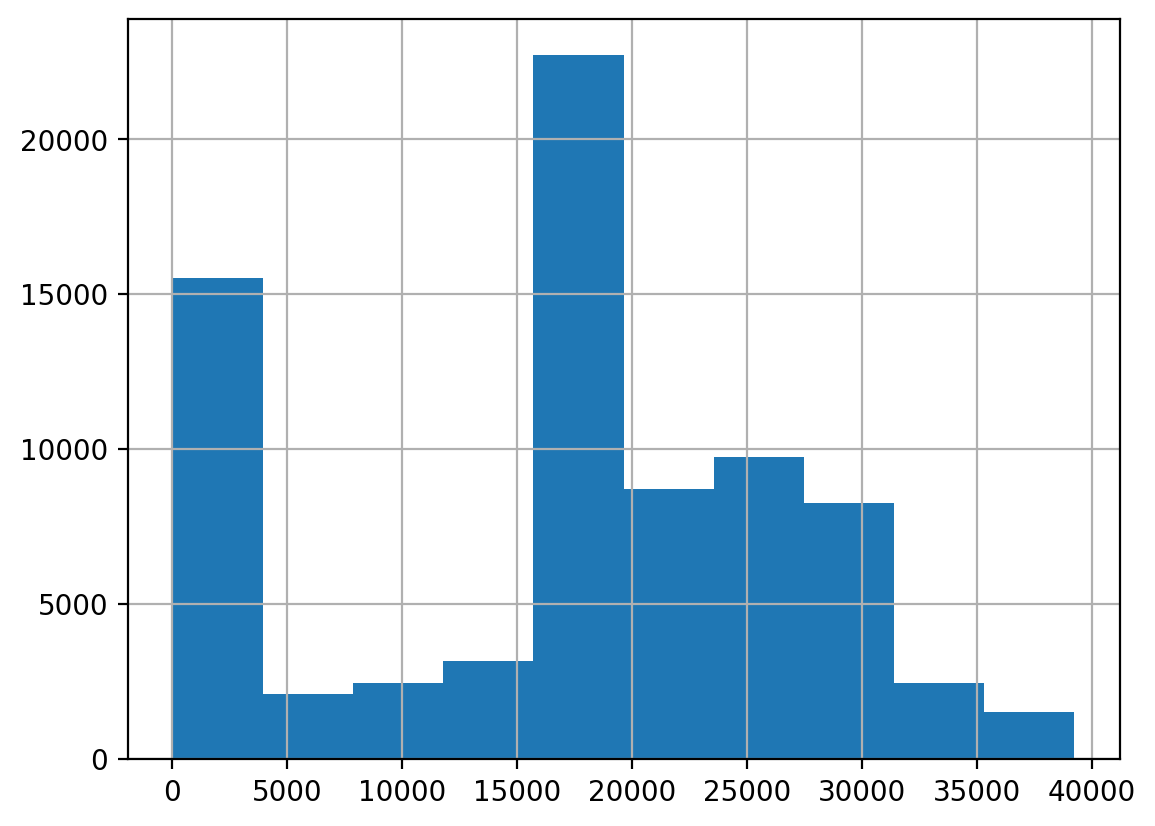

In [9]:
data['tag_id'].hist();

In [10]:
data['tag_name'].nunique()

7091

In [11]:
data['tag_name'].value_counts()

college              3744
career               1566
medicine             1324
engineering          1083
business              989
                     ... 
air-force-officer       1
uncertainty             1
prestige                1
x-rays                  1
nation                  1
Name: tag_name, Length: 7091, dtype: int64

In [12]:
(data['tag_name'].value_counts() > 5).sum()

1432

In [13]:
(data['tag_name'].value_counts() < 5).sum()

5421

<AxesSubplot:>

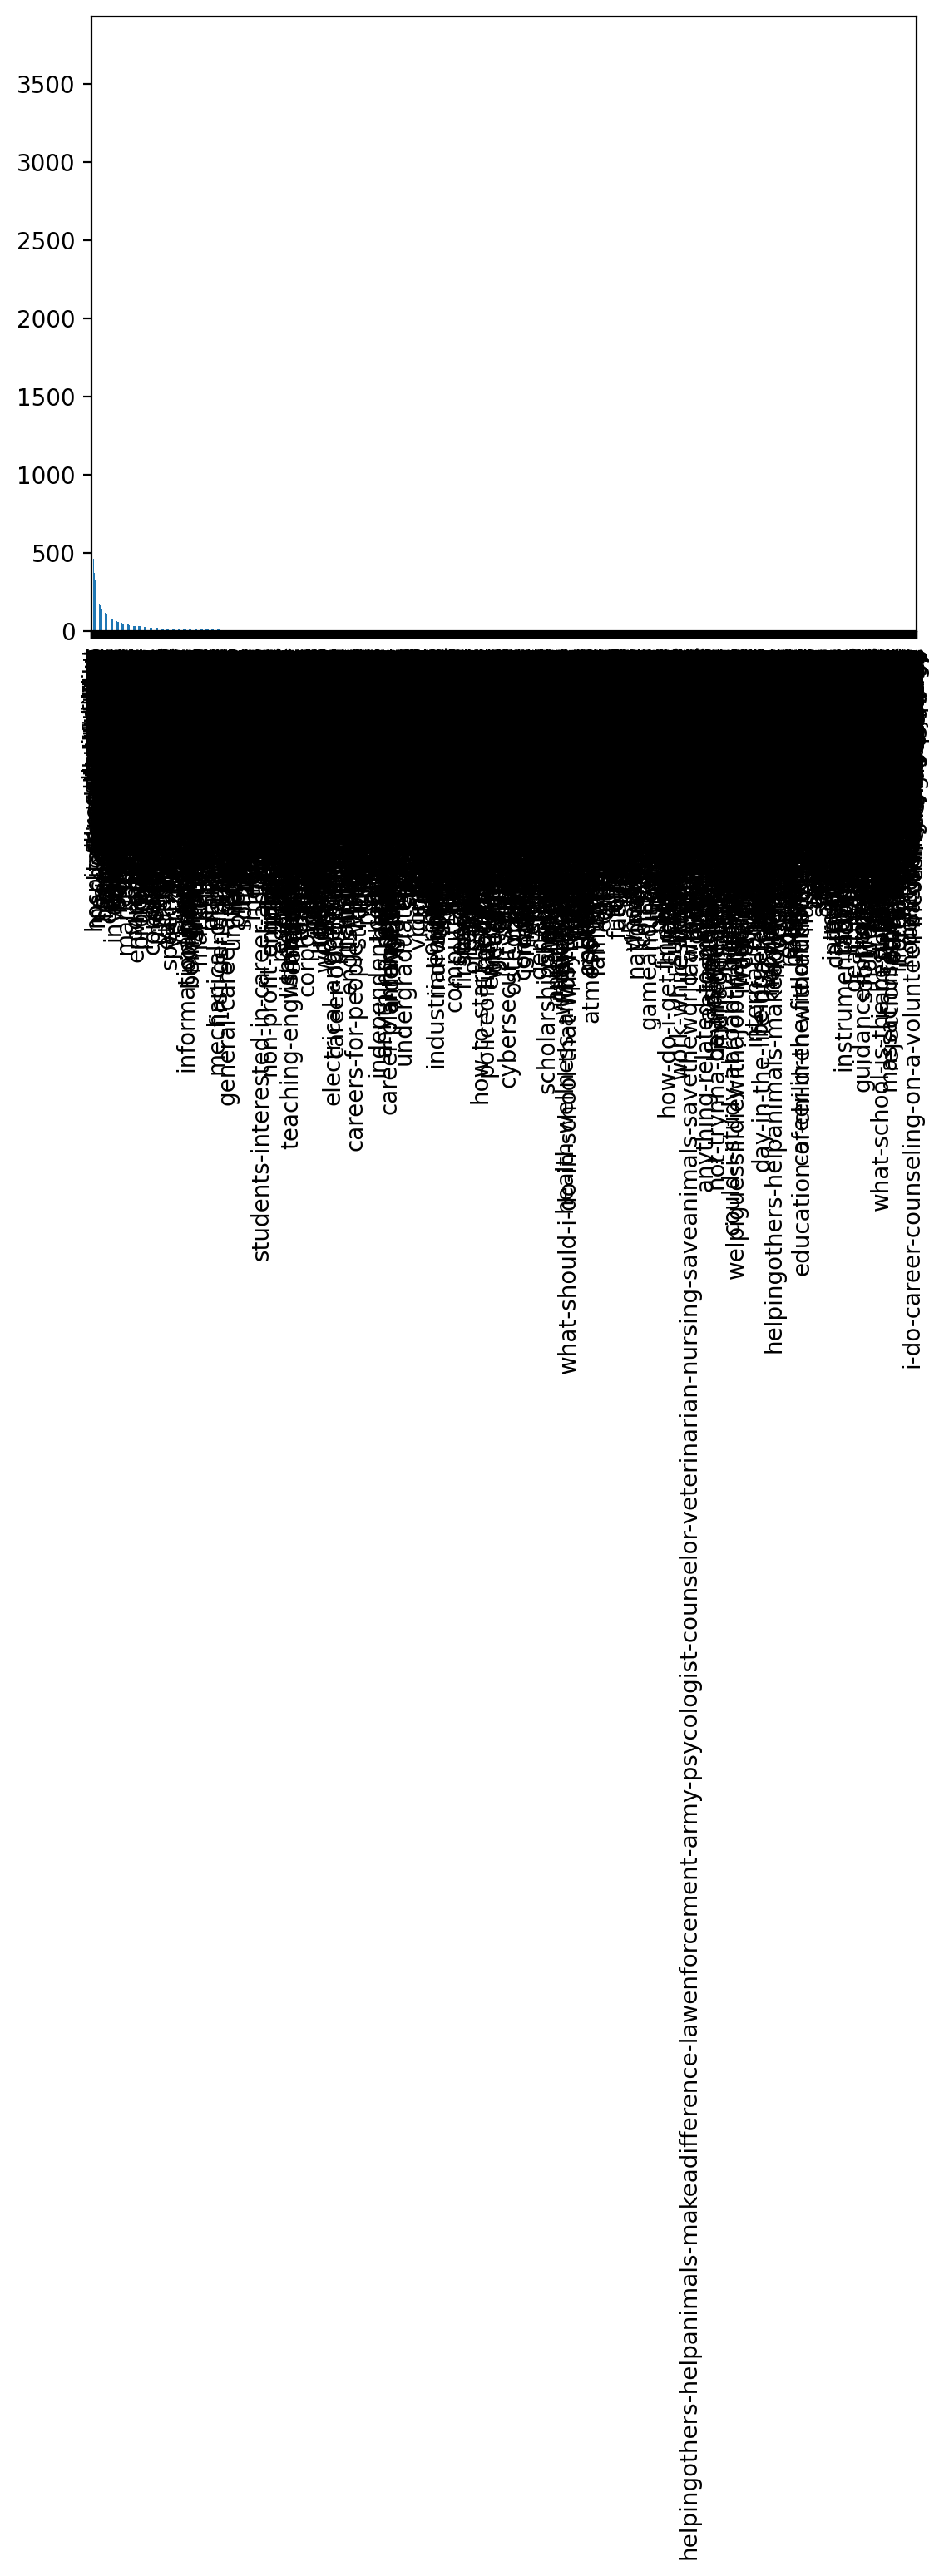

In [14]:
data['tag_name'].value_counts().plot(kind='bar')

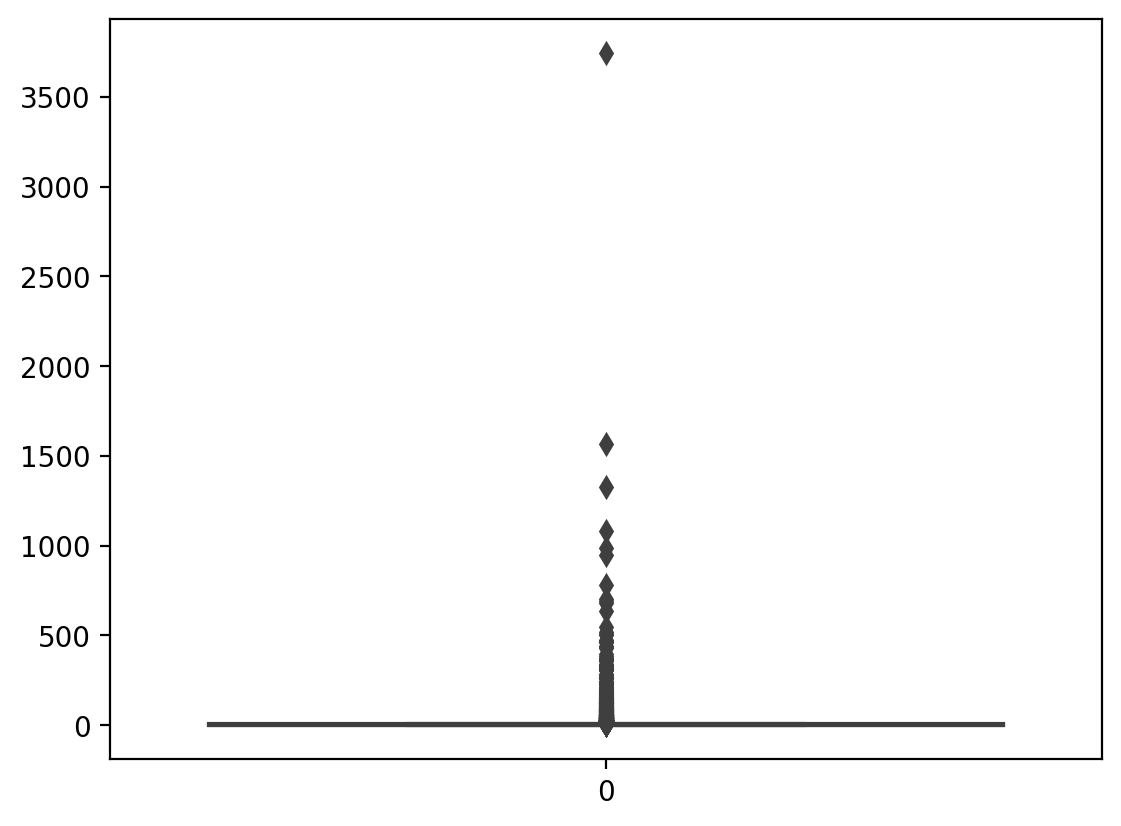

In [15]:
sns.boxplot(data['tag_name'].value_counts());

I wanted to get a sense for how the tagging system works. Since there wasn't an in-depth data-dictionary or explanation of the tagging system works, one of the main things I wanted to understand was if the tags were limited to the what the site allowed, or 'free-form' allowing students to type whatever they want. To do this I create variables `huge_tags`, `big_tags`, `med_tags`, `sm_tags`, and `one_tag`.

Through this we can see that out of 7091 unique tags, 3687 (roughly 52%) were used only once and 5421 were used less than 5 times (about 76%). 

In order to create a recommender system one of the key elements is to have a good tagging system. In this case, having a tag used only once is the same as having no tags. Having 76% of the tags infrequently used makes it hard to provide a good recommendation based on tagging. 

#### Declaring tag_freq() function:

I created a tag_freq() function to make it easier to get the tag frequency. It takes in the following arguments; 'size' (an integer) with the number you want the data to be bigger or smaller than and, 'sign', taking in the strings 'more' or 'less' to choose whether to return tags with more or less frequency than the 'size'. 

Using boolean statements we get the size of the data. The function returns the tags, as well as prints the percentage and count of tags qualifying for the boolean arguments. 

In [16]:
# Getting the number of unique tags to use to calculate the percentage of tags within the function
n_tags = data['tag_name'].nunique()

def tag_freq(size, sign):
    '''
    size: takes in an integer for how often we want the tags to occur in the dataframe
    sign: options are the strings 'more', 'less', 'equal', 
    if anything else is input then it will return "please use the strings" one of the strings 'more', 'less',
    
    Uses boolean statements we get the size of the data. The function returns the tags, 
    as well as prints the percentage and count of tags qualifying for the arguements booleans. 
    '''
    
    if sign == 'more':
        tags = (data['tag_name'].value_counts() > size).astype(int)
    elif sign == 'less':
        tags = (data['tag_name'].value_counts() < size).astype(int)

    else:
        print("It seems like you haven't input the sign value correctly, 'more' or 'less'")
    
    
    tags = tags[tags == 1].index
    n = tags.nunique()
    print(round(n/n_tags, 2)*100, f"% of tags occur {sign} than {size} times")
    print(tags.nunique(), f"tags occur {sign} than {size} times")
    
    return tags

#### Examining tags that occur more that 50 times

These are tags that are used more than 50 times out of 23,288 Unique Questions (More than one tag can be applied per question). 262 tags out of 7091 tags that are used more than 50 times in the 23k questions. 

In [17]:
tag_freq(50, 'more')

4.0 % of tags occur more than 50 times
262 tags occur more than 50 times


Index(['college', 'career', 'medicine', 'engineering', 'business', 'doctor',
       'college-major', 'science', 'nursing', 'psychology',
       ...
       'pharmacist', 'nonprofits', 'actor', 'coding', 'medical-practice',
       'occupational-therapy', 'film-production', 'anthropology',
       'fashion-design', 'biotechnology'],
      dtype='object', length=262)

#### Examining tags that occur more that 10 times

These are tags that are used more than 10 times out of 23,288 Unique Questions. 

In [18]:
tag_freq(10, 'more')

12.0 % of tags occur more than 10 times
875 tags occur more than 10 times


Index(['college', 'career', 'medicine', 'engineering', 'business', 'doctor',
       'college-major', 'science', 'nursing', 'psychology',
       ...
       'cia', 'career-decisions', 'auditing', 'question', 'public-policy',
       'nuclear-engineering', 'start-ups', 'policy', 'recommendation',
       'teeth'],
      dtype='object', length=875)

#### Examining tags that occur more that 5 times


In [19]:
tag_freq(5, 'more')

20.0 % of tags occur more than 5 times
1432 tags occur more than 5 times


Index(['college', 'career', 'medicine', 'engineering', 'business', 'doctor',
       'college-major', 'science', 'nursing', 'psychology',
       ...
       'it-support', 'interest', 'dental-assistant', 'rapper', 'person',
       'team-leadership', 'immigration-law', 'medical-assistant',
       'forensic-investigation', 'asl'],
      dtype='object', length=1432)

#### Examining tags that occur LESS that 5 times


In [20]:
tag_freq(5, 'less')

76.0 % of tags occur less than 5 times
5421 tags occur less than 5 times


Index(['masters-in-pyschology', 'lab-technician', 'tattoos', 'veterans',
       'musicals', 'labor-and-delivery', 'horseridinginstructor', 'musicians',
       'junior-year', 'md-phd',
       ...
       'music-studios', 'free-studying', 'csusb', 'gradstudent', 'womeninag',
       'air-force-officer', 'uncertainty', 'prestige', 'x-rays', 'nation'],
      dtype='object', length=5421)

#### Examining tags that occur once


In [21]:
tag_freq(2, 'less')

52.0 % of tags occur less than 2 times
3687 tags occur less than 2 times


Index(['ballerfromdaholler', 'mental-health-support', 'two', 'keytosuccess',
       'self-publishing', 'collegadvice', 'collegeadmission', 'medecine',
       'arthasmyheart', 'special-victims',
       ...
       'music-studios', 'free-studying', 'csusb', 'gradstudent', 'womeninag',
       'air-force-officer', 'uncertainty', 'prestige', 'x-rays', 'nation'],
      dtype='object', length=3687)

---
## How many questions have tags?


In [30]:
has_tag_df = pd.read_csv('./Datasets/df_ques_with_ans_tag_indicator.csv')

In [31]:
has_tag_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,was_answered,has_tag
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1.0,1.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,1.0,1.0
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1.0,1.0
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,1.0,1.0
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,1.0,1.0


In [32]:
has_tag_df['has_tag'].nunique()

1

In [33]:
(has_tag_df['has_tag']==1).sum()

23288

In [34]:
has_tag_df['has_tag'].size

23931

In [35]:
(has_tag_df['has_tag']==0).sum()

0

In [36]:
has_tag_df['has_tag'].isna().sum()

643

Thus, we can see that 23288 questions out of 23931 (97.31%) have tags related to them.